In [1]:
import pandas as pd
%  matplotlib inline

In [2]:
adult = pd.read_csv('adult.csv')

In [3]:
# Top 5 records
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
# Feature avaiable
for i in adult.columns:
    print(i)

age
workclass
fnlwgt
education
educational-num
marital-status
occupation
relationship
race
gender
capital-gain
capital-loss
hours-per-week
native-country
income


In [17]:
# Summary Statistics
adult.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


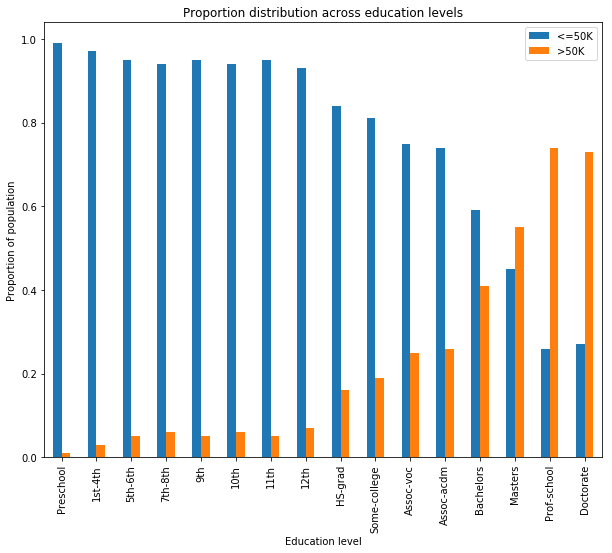

In [52]:
education = round(pd.crosstab(adult.education, adult.income).div(pd.crosstab(adult.education, adult.income).apply(sum,1),0),2)
education = pd.merge(education, 
                     adult[['educational-num','education']].drop_duplicates().set_index('educational-num'), 
                     how = 'right', 
                     left_index = True, right_index = False, right_on = 'education')
education.sort_index(inplace = True)

ax = education.plot(kind ='bar', title = 'Proportion distribution across education levels', figsize = (10,8))
ax.set_xticklabels(education.education)
ax.set_xlabel('Education level')
ax.set_ylabel('Proportion of population')

print()

In [60]:
for i in adult.columns:
    print(round(pd.crosstab(adult[i], adult.income).div(pd.crosstab(adult[i], adult.income).apply(sum,1),0),2))

income  <=50K  >50K
age                
17       1.00  0.00
18       1.00  0.00
19       1.00  0.00
20       1.00  0.00
21       0.99  0.01
22       0.99  0.01
23       0.98  0.02
24       0.96  0.04
25       0.94  0.06
26       0.93  0.07
27       0.91  0.09
28       0.86  0.14
29       0.84  0.16
30       0.81  0.19
31       0.79  0.21
32       0.76  0.24
33       0.78  0.22
34       0.73  0.27
35       0.75  0.25
36       0.70  0.30
37       0.67  0.33
38       0.67  0.33
39       0.65  0.35
40       0.67  0.33
41       0.65  0.35
42       0.64  0.36
43       0.63  0.37
44       0.62  0.38
45       0.62  0.38
46       0.60  0.40
..        ...   ...
61       0.69  0.31
62       0.74  0.26
63       0.73  0.27
64       0.74  0.26
65       0.75  0.25
66       0.76  0.24
67       0.76  0.24
68       0.79  0.21
69       0.79  0.21
70       0.81  0.19
71       0.76  0.24
72       0.87  0.13
73       0.84  0.16
74       0.77  0.23
75       0.82  0.18
76       0.88  0.12
77       0.85  0.15


In [62]:
round(pd.crosstab(adult.gender, adult.income).div(pd.crosstab(adult.gender, adult.income).apply(sum,1),0),2)

income,<=50K,>50K
gender,,
Female,0.89,0.11
Male,0.70,0.30
